![](img/image.png)

# Тестовое задание	
		
### Наглядно представить ТОП-20 материалов по просмотрам за неделю	

1. Оформить ТОП-20 в виде таблицы с заголовками материалов, при этом заголовок необходимо сделать активной ссылкой с возможностью перехода на статью на сайте (адрес страницы - столбец URL на листе База публикаций).	
2. Визуализировать полученные данные	
3. Все этапы выполнения задания должны быть сохранены в файле или описаны отдельно	
		
Обратите внимание: у каждой публикации есть уникальный id, который находится в конце адреса страницы (например,5c4af9ed9a7947bd94fe0cc9), при этом полный адрес страницы может отличаться	
		
Из отчёта должны быть исключены просмотры, содержащие след. URL: 	

    test.pro	
	test.v2.pro	
	feature-rbcnews	
	/preview/	
	staging.pro	
	staging.v2.pro	
		
Лист База публикаций - список опубликованных материалов со ссылками на сайт и заголовками	
Лист Выгрузка - данные по просмотрам материалов за отчётный период	

In [1]:
import pandas as pd

Прежде чем подгружать данные, исходный файл был разбит по листам на 2 файла: 'data.xlsx' - лист 'База публикаций', 'unloading.xlsx' - лист 'Выгрузка'.

Далее читаем информации из файлов.

In [2]:
data = pd.read_excel('data.xlsx')
data

,ID публикации,Заголовок материала,URL
0,5bf52faf9a79477da426e81b,Как обанкротиться подешевле: прагматичные наст...,https://pro.rbc.ru/news/5bf52faf9a79477da426e81b
1,5c04ee439a7947b3fe48fe55,Имитация тунца: как искусственная рыба вытесня...,https://pro.rbc.ru/news/5c04ee439a7947b3fe48fe55
2,5c04f06c9a7947b48d48fe60,Сколько россияне тратят на путешествия,https://pro.rbc.ru/news/5c04f06c9a7947b48d48fe60
3,5c0695d69a79472e0096479e,Самые ходовые: какие специалисты в строительст...,https://pro.rbc.ru/news/5c0695d69a79472e0096479e
4,5c07891f9a794775e61affd1,Как запустить новый продукт: четыре обязательн...,https://pro.rbc.ru/news/5c07891f9a794775e61affd1
...,...,...,...
449,5c6585789a7947493d396dc7,Как потребителей заставили платить больше: чет...,https://pro.rbc.ru/news/5c6585789a7947493d396dc7
450,5c658e479a79474d32847233,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, н...",https://pro.rbc.ru/news/5c658e479a79474d32847233
451,5c65950d9a79474f82f780d7,«Алые паруса» сворачиваются: почему владельцы ...,https://pro.rbc.ru/news/5c65950d9a79474f82f780d7
452,5c666dd69a794787c020c0bf,Золушки молла: где маленьким сервисам найти пр...,https://pro.rbc.ru/news/5c666dd69a794787c020c0bf


In [3]:
unloading = pd.read_excel('unloading.xlsx', header=2)
unloading

,Адрес страницы,Просмотры
0,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849
1,http://pro.rbc.ru/news/5c61b2d39a794798b96fab0c,2845
2,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,2819
3,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,2736
4,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6,2704
...,...,...
2691,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,1
2692,https://pro.rbc.ru/news/5c6297279a7947d83339d513,1
2693,https://pro.rbc.ru/news/5c62c45c9a7947eaedb915e4,1
2694,https://pro.rbc.ru/news/5c643a319a794760bbe62974,1


Исключаем лишние URL (test.pro, test.v2.pro, feature-rbcnews, /preview/, staging.pro, staging.v2.pro) из датафрейма.

In [4]:
unloading_filtred = unloading[(~unloading['Адрес страницы'].str.contains('test.pro', case=False)) &
                              (~unloading['Адрес страницы'].str.contains('test.v2.pro', case=False)) &
                              (~unloading['Адрес страницы'].str.contains('feature-rbcnews', case=False)) &
                              (~unloading['Адрес страницы'].str.contains('/preview/', case=False)) &
                              (~unloading['Адрес страницы'].str.contains('staging.pro', case=False)) &
                              (~unloading['Адрес страницы'].str.contains('staging.v2.pro', case=False))
                              ]
unloading_filtred


,Адрес страницы,Просмотры
0,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849
1,http://pro.rbc.ru/news/5c61b2d39a794798b96fab0c,2845
2,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,2819
3,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,2736
4,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6,2704
...,...,...
2691,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,1
2692,https://pro.rbc.ru/news/5c6297279a7947d83339d513,1
2693,https://pro.rbc.ru/news/5c62c45c9a7947eaedb915e4,1
2694,https://pro.rbc.ru/news/5c643a319a794760bbe62974,1


Переименовываю столбец для будущего объединения датафреймов.

In [5]:
unloading_filtred.columns = ['URL', 'Просмотры']
unloading_filtred

,URL,Просмотры
0,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849
1,http://pro.rbc.ru/news/5c61b2d39a794798b96fab0c,2845
2,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,2819
3,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,2736
4,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6,2704
...,...,...
2691,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,1
2692,https://pro.rbc.ru/news/5c6297279a7947d83339d513,1
2693,https://pro.rbc.ru/news/5c62c45c9a7947eaedb915e4,1
2694,https://pro.rbc.ru/news/5c643a319a794760bbe62974,1


Объединяю таблицы по URL.

In [6]:
sorted_data = unloading_filtred.merge(data, on='URL', how='inner')
sorted_data

,URL,Просмотры,ID публикации,Заголовок материала
0,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849,5c4af9ed9a7947bd94fe0cc9,Гнетущее молчание на совещании: как разрешить ...
1,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,1185,5c4af9ed9a7947bd94fe0cc9,Гнетущее молчание на совещании: как разрешить ...
2,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,159,5c4af9ed9a7947bd94fe0cc9,Гнетущее молчание на совещании: как разрешить ...
3,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,65,5c4af9ed9a7947bd94fe0cc9,Гнетущее молчание на совещании: как разрешить ...
4,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,26,5c4af9ed9a7947bd94fe0cc9,Гнетущее молчание на совещании: как разрешить ...
...,...,...,...,...
1750,https://pro.rbc.ru/news/5c125b1a9a794773c945fd60,1,5c125b1a9a794773c945fd60,Бананы и киндер-сюрпризы: что москвичи заказыв...
1751,https://pro.rbc.ru/news/5c0fcd779a7947a6b2f354f7,1,5c0fcd779a7947a6b2f354f7,Ставка на zero: как девелоперы расплачиваются ...
1752,https://pro.rbc.ru/news/5c4194e89a79473055f8e8fc,1,5c4194e89a79473055f8e8fc,Плюсы и минусы удаленной работы: опрос соискат...
1753,https://pro.rbc.ru/news/5c4194e89a79473055f8e8fc,1,5c4194e89a79473055f8e8fc,Плюсы и минусы удаленной работы: опрос соискат...


In [7]:
sorted_data = sorted_data.drop(['ID публикации'], axis=1)

Получаем следующую таблицу, после того как убрали лишний столбец.

In [8]:
sorted_data = sorted_data[['Заголовок материала', 'Просмотры', 'URL']].sort_values('Просмотры', ascending=False)
sorted_data.reset_index(drop=True, inplace=True)
sorted_data.head(20)

,Заголовок материала,Просмотры,URL
0,Гнетущее молчание на совещании: как разрешить ...,2849,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9
1,Математика российского люкса: точный портрет п...,2819,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3
2,Связанные кешбэком: как ретейл зарабатывает на...,2704,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6
3,Как трансформируется логистика в ретейле: лучш...,2691,https://pro.rbc.ru/news/5c60c9fd9a794747ed04cfe2
4,Роберт Киган — РБК: «Сотрудники тратят на рабо...,2615,https://pro.rbc.ru/news/5c5436a39a79472d6c58bca8
5,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, н...",2589,https://pro.rbc.ru/news/5c658e479a79474d32847233
6,Недооцененный экспорт: что имеет смысл продава...,2588,https://pro.rbc.ru/news/5c503adb9a794784a693903b
7,«Алые паруса» сворачиваются: почему владельцы ...,2577,https://pro.rbc.ru/news/5c65950d9a79474f82f780d7
8,Эксперты: российскому рынку кофеен можно «попр...,2566,https://pro.rbc.ru/news/5c627bba9a7947cb36ac9898
9,Россиянам все труднее платить ипотеку и покупа...,2524,https://pro.rbc.ru/news/5c6400fa9a79474974a37aab


Убираем все данные ниже 20 строки

In [9]:
sorted_data = sorted_data.loc[:19] 
sorted_data

,Заголовок материала,Просмотры,URL
0,Гнетущее молчание на совещании: как разрешить ...,2849,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9
1,Математика российского люкса: точный портрет п...,2819,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3
2,Связанные кешбэком: как ретейл зарабатывает на...,2704,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6
3,Как трансформируется логистика в ретейле: лучш...,2691,https://pro.rbc.ru/news/5c60c9fd9a794747ed04cfe2
4,Роберт Киган — РБК: «Сотрудники тратят на рабо...,2615,https://pro.rbc.ru/news/5c5436a39a79472d6c58bca8
5,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, н...",2589,https://pro.rbc.ru/news/5c658e479a79474d32847233
6,Недооцененный экспорт: что имеет смысл продава...,2588,https://pro.rbc.ru/news/5c503adb9a794784a693903b
7,«Алые паруса» сворачиваются: почему владельцы ...,2577,https://pro.rbc.ru/news/5c65950d9a79474f82f780d7
8,Эксперты: российскому рынку кофеен можно «попр...,2566,https://pro.rbc.ru/news/5c627bba9a7947cb36ac9898
9,Россиянам все труднее платить ипотеку и покупа...,2524,https://pro.rbc.ru/news/5c6400fa9a79474974a37aab


In [10]:
# Сохраняем полученный датафрейм на диск.
sorted_data.to_excel("TOP_20_from_python.xlsx")

### Визуализация полученных данных.

In [11]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# Импортируем необходимую библиотеку для визуализацию
import matplotlib.pyplot as plt

#### Вариант № 1

Text(0.5, 1.0, 'ТОП-20 материалов по просмотрам за неделю')

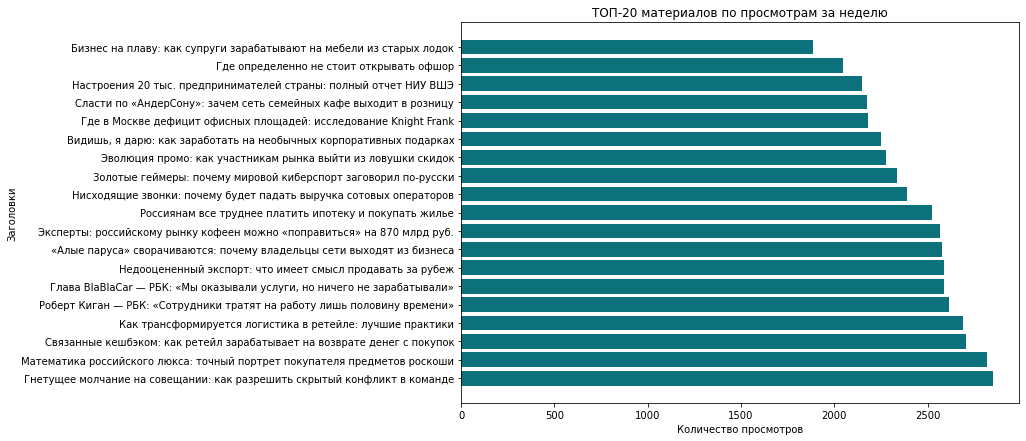

In [12]:
plt.barh(sorted_data['Заголовок материала'], sorted_data['Просмотры'], color='#0c717b')
plt.xlabel('Количество просмотров')
plt.ylabel('Заголовки')
plt.title('ТОП-20 материалов по просмотрам за неделю')

#### Вариант № 2

In [13]:
sorted_data[['Заголовок материала','Просмотры']].style.hide_index().bar(color='#71b88e')

Заголовок материала,Просмотры
Гнетущее молчание на совещании: как разрешить скрытый конфликт в команде,2849
Математика российского люкса: точный портрет покупателя предметов роскоши,2819
Связанные кешбэком: как ретейл зарабатывает на возврате денег с покупок,2704
Как трансформируется логистика в ретейле: лучшие практики,2691
Роберт Киган — РБК: «Сотрудники тратят на работу лишь половину времени»,2615
"Глава BlaBlaCar — РБК: «Мы оказывали услуги, но ничего не зарабатывали»",2589
Недооцененный экспорт: что имеет смысл продавать за рубеж,2588
«Алые паруса» сворачиваются: почему владельцы сети выходят из бизнеса,2577
Эксперты: российскому рынку кофеен можно «поправиться» на 870 млрд руб.,2566
Россиянам все труднее платить ипотеку и покупать жилье,2524


### ТОП-20 в виде таблицы с заголовками материалов c активными ссылками и с возможностью перехода на статью на сайте.

Ниже по ссылке можно скачать таблицу (если при нажатии автоматического скачивания не произойдет, необходимо скопировать ссылку и запустить в новой вкладке/окне).

https://github.com/Anton-Komissarov/Projects/raw/main/RBK_visualization_of_top_20_materials/TOP_20.xlsx